# Solutions for problem set 1 

## 1.Linear Classifiers (logistic regression and GDA)
### (a) logistic regression
\begin{align*}
\frac{\partial J(\theta )}{\partial \theta _k}&=-\frac{1}{m}\sum_{i=1}^m{\left[ y^{(i)}\frac{x_{k}^{(i)}}{h_{\theta}\left( x^{(i)} \right)}\left( h_{\theta}\left( x^{(i)} \right) \left( 1-h_{\theta}\left( x^{(i)} \right) \right) +\left( 1-y^{(i)} \right) \frac{-x_{k}^{(i)}}{1-h_{\theta}\left( x^{(i)} \right)}h_{\theta}\left( x^{(i)} \right) \left( 1-h_{\theta}\left( x^{(i)} \right) \right) \right] \right.}
\\
&=-\frac{1}{m}\sum_{i=1}^m{\left[ y^{(i)}x_{k}^{(i)}\left( 1-h_{\theta}\left( x^{(i)} \right) \right) -\left( 1-y^{(i)} \right) x_{k}^{(i)}h_{\theta}\left( x^{(i)} \right) \right]}
\\
\frac{\partial ^2J(\theta )}{\partial \theta _k\partial \theta _l}&=\frac{1}{m}\sum_{i=1}^m{x_{k}^{(i)}}x_{l}^{(i)}h_{\theta}\left( x^{(i)} \right) \left( 1-h_{\theta}\left( x^{(i)} \right) \right)\\
	H_{kl}&=\frac{\partial ^2J(\theta )}{\partial \theta _k\partial \theta _l}\\
	z^{\top}Hz&=\frac{1}{m}\sum_k{\sum_l{\sum_{i=1}^m{z_k}}}x_{k}^{(i)}x_{l}^{(i)}z_lh_{\theta}\left( x^{(i)} \right) \left( 1-h_{\theta}\left( x^{(i)} \right) \right)\\
	&=\frac{1}{m}\sum_{i=1}^m{\left[ h_{\theta}\left( x^{(i)} \right) \left( 1-h_{\theta}\left( x^{(i)} \right) \right) \sum_k{\sum_l{z_k}}x_{k}^{(i)}x_{l}^{(i)}z_l \right]}\\
	&=\frac{1}{m}\sum_{i=1}^m{\left[ h_{\theta}\left( x^{(i)} \right) \left( 1-h_{\theta}\left( x^{(i)} \right) \right) \left( z^{\top}x^{(i)} \right) ^2 \right]}\\
	&\geqslant 0\\
\end{align*}


### (b) Newton method for logistic regression(coding)

1.For training set:


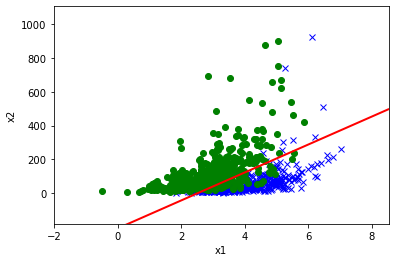

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825
2.For test set:


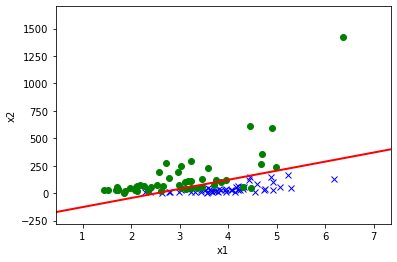

The accuracy on validation set is:  0.9


In [1]:
from p01b_logreg import main as p01b
p01b(train_path='../data/ds1_train.csv',
         eval_path='../data/ds1_valid.csv',
         pred_path='output/p01b_pred_1.txt')

### (c) GDA parameterization 1
\begin{align*}
	P\left( y=1\mid x;\phi ,\mu _0,\mu _1,\Sigma \right) &=\frac{P(x\mid y=1)P(y=1)}{P(x\mid y=0)P(y=0)+P(x\mid y=1)P(y=1)}\\
	&=\frac{\phi \exp \left( -\frac{1}{2}\left( x-\mu _1 \right) ^{\top}\Sigma ^{-1}\left( x-\mu _1 \right) \right)}{(1-\phi )\exp \left( -\frac{1}{2}\left( x-\mu _0 \right) ^{\top}\Sigma ^{-1}\left( x-\mu _0 \right) \right) +\phi \exp \left( -\frac{1}{2}\left( x-\mu _1 \right) ^{\top}\Sigma ^{-1}\left( x-\mu _1 \right) \right)}\\
	&=\frac{1}{1+\left( \frac{1-\phi}{\phi} \right) \exp \left[ -\frac{1}{2}\left( x\varepsilon ^{-1}x-2\mu _{0}^{\top}\Sigma ^{-1}x+\mu _{0}^{\top}\Sigma ^{-1}\mu _0-x\Sigma ^{-1}x+2\mu _{1}^{\top}\varepsilon ^{-1}x-\mu _{1}^{\top}\varepsilon ^{-1}M_1 \right) \right.}\\
	&=\frac{1}{1+\left( \frac{1-\phi}{\phi} \right) \exp \left[ \left( \mu _{0}^{\top}\Sigma ^{-1}-\mu _{1}^{\top}\Sigma ^{-1} \right) x+\frac{1}{2}\mu _{1}^{\top}\Sigma ^{-1}\mu _1-\frac{1}{2}\mu _{0}^{\top}\Sigma ^{-1}\mu _0 \right]}\\
	&=\frac{1}{1+\exp \left[ -\left( \left( \mu _{1}^{\top}\Sigma ^{-1}-\mu _{0}^{\top}\Sigma ^{-1} \right) x+\frac{1}{2}\left( \mu _{0}^{\top}\Sigma ^{-1}\mu _0-\mu _{1}^{\top}\Sigma ^{-1}\mu _1-2\ln \frac{1-\phi}{\phi} \right) \right] \right.}\\
	&=\frac{1}{1+\exp \left( -\left( \theta ^{\top}x+\theta _0 \right) \right)}\\
	\theta =\Sigma ^{-1}\left( \mu _1-\mu _0 \right) ,\theta _0&=\frac{1}{2}\left( \mu _{0}^{\top}\Sigma ^{-1}\mu _0-\mu _{1}^{\top}\Sigma ^{-1}\mu _1-2\ln \frac{1-\phi}{\phi} \right)\\
\end{align*}

### (d) GDA parameterization 2
\begin{aligned}
	l\left( \phi ,\mu _1,\mu _0,\Sigma \right) &=\log \prod_{i=1}^m{P}\left( x^{\left( i \right)}\mid y^{\left( i \right)};\mu _0,\mu _1,\Sigma \right) P\left( y^{(i)};\phi \right)\\
	&=\sum_{i=1}^m{\left[ 1\left\{ y^{(i)}=1 \right\} \left( \log \phi -\frac{1}{2}\left( x^{(i)}-\mu _1 \right) ^{\top}\Sigma ^{-1}\left( x^{(i)}-\mu _1 \right) \right) \right]}+\sum_{i=1}^m{\left[ 1\left\{ y^{(i)}=0 \right\} \left( \log\mathrm{(}1-\phi )-\frac{1}{2}\left( x^{(i)}-\mu _0 \right) ^{\top}\Sigma ^{-1}\left( x^{(i)}-\mu _0 \right) \right) \right]}+m\log \frac{1}{(2\pi )^{n/2}\left| \varSigma \right|^{1/2}}\\
	&=\sum_{i=1}^m{\left[ 1\left\{ y^{(i)}=1 \right\} \left( \log \phi -\frac{1}{2}\left( x^{(i)}-\mu _1 \right) ^{\top}\Sigma ^{-1}\left( x^{(i)}-\mu _1 \right) \right) \right]}+\sum_{i=1}^m{\left[ 1\left\{ y^{(i)}=0 \right\} \left( \log\mathrm{(}1-\phi )-\frac{1}{2}\left( x^{(i)}-\mu _0 \right) ^{\top}\Sigma ^{-1}\left( x^{(i)}-\mu _0 \right) \right) \right]}-m\left( \frac{n}{2}\log 2\pi +\frac{1}{2}\log |\varSigma | \right)\\
	\frac{\partial l}{\partial \phi}&=\frac{\sum_{i=1}^m{\mid}\left\{ y^{(i)}=1 \right\}}{\phi}-\frac{\sum_{i=1}^m{\mid}\left\{ y^{(i)}=0 \right\}}{1-\phi}=0\\
    \\
	\phi &=\frac{1}{m}\sum_{i=1}^m{\mid}\left\{ y^{(i)}=1 \right\}\\
    \\
	\frac{\partial l}{\partial \mu _1}&=\sum_{i=1}^m{\left[ 1\left\{ y^{(i)}=1 \right\} \left( -\Sigma ^{-1}\mu _1+\Sigma ^{-1}x^{(i)} \right) \right]}=0\\
	\mu _1&=\frac{\sum_{i=1}^m{1\left\{ y^{(i)}=1 \right\} x^{(i)}}}{\sum_{i=1}^m{1\left\{ y^{(i)}=1 \right\}}}\\
	\frac{\partial l}{\partial \mu _0}&=\sum_{i=1}^m{\left[ 1\left\{ y^{(i)}=0 \right\} \left( -\sum_{-1}{\mu _0}+\sum_{-1}{x^{(i)}} \right) \right]}=0\\
    \\
	\mu _0&=\frac{\sum_{i=1}^m{1}\left\{ y^{(i)}=0 \right\} x^{(i)}}{\sum_{i=1}^m{1}\left\{ y^{(i)}=0 \right\}}\\
	\\
    \frac{\partial L}{\partial \Sigma ^{-1}}&=\frac{\partial}{\partial \Sigma ^{-1}}\left[ -\frac{1}{2}\sum_{i=1}^m{\left( x^{(i)}-\mu _{y^{(i)}} \right) ^{\top}}\Sigma ^{-1}\left( x^{(i)}-\mu _{y^{(i)}} \right) -\frac{m}{2}\log |\Sigma | \right]\\
	&=\frac{\partial}{\partial \Sigma ^{-1}}\left[ -\frac{1}{2}\sum_{i=1}^m{\left( x^{(i)}-\mu _{y^{(i)}} \right) ^{\top}}\Sigma ^{-1}\left( x^{(i)}-\mu _{y^{(i)}} \right) +\frac{m}{2}\log \left| \Sigma ^{-1} \right| \right]\\
	&=-\frac{1}{2}\sum_{i=1}^m{\left( x^{(i)}-\mu _{y^{(i)}} \right)}\left( x^{(i)}-\mu _{y^{(i)}} \right) ^{\top}+\frac{m}{2}\left( \Sigma ^{-1} \right) ^{-\top}\\
	&=-\frac{1}{2}\sum_{i=1}^m{\left( x^{(i)}-\mu _{y^{(i)}} \right)}\left( x^{(i)}-\mu _{y^{(i)}} \right) ^{\top}+\frac{m}{2}\Sigma\\
	&=0\\
    \\
    \Sigma &= \frac{1}{m}\sum_{i=1}^m{\left( x^{(i)}-\mu _{y^{(i)}} \right)}\left( x^{(i)}-\mu _{y^{(i)}} \right) ^{\top}
\end{aligned}

### (e) GDA(coding)

In [1]:
from p01e_gda import main as p01e
p01e(train_path='../data/ds2_train.csv',
         eval_path='../data/ds2_valid.csv',
         pred_path='output/p01e_pred_2.txt')

1.For training set:
Theta is:  [ 2.50874989  3.76951271 -3.94657107]
The accuracy on training set is:  0.8475
2.For test set:
The accuracy on validation set is:  0.82


### (f) Plot

In [ ]:
def plot(x, y, theta_1, legend_1=None, theta_2=None, legend_2=None, title=None, correction=1.0):
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta_1^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    plt.plot(x1, x2, c='red', label=legend_1, linewidth=2)

    # Plot decision boundary (found by solving for theta_2^T x = 0)
    if theta_2 is not None:
        x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
        x2 = -(theta_2[0] / theta_1[2] * correction + theta_2[1] / theta_2[2] * x1)
        plt.plot(x1, x2, c='black', label=legend_2, linewidth=2)

    # Add labels, legend and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    if legend_1 is not None or legend_2 is not None:
        plt.legend(loc="upper left")
    if title is not None:
        plt.suptitle(title, fontsize=12)

### (g) 
GDA performs better when the data set is guassian distributed

## 2. Incomplete, Positive-Only Labels

### (a)
\begin{aligned}
	P\left( y^{(i)}=1\mid t^{(i)}=1,x^{(i)} \right) &=\frac{P\left( y^{(i)}=1,t^{(i)}=1\mid x^{(i)} \right)}{P\left( t^{(i)}=1\mid x^{(i)} \right)}\\
	P\left( y^{(i)}=1\mid t^{(i)}=1 \right) &=\frac{P\left( y^{\left( i \right)}=1\mid x^{(i)} \right)}{P\left( t^{(i)}=1\mid x^{(i)} \right)}\\
	\alpha &=P\left( y^{(i)}=1\mid t^{(i)}=1 \right)\\
\end{aligned}

### (b) 
easy to prove by the result above
\begin{align*}
h(x^{(i)}) & \approx p(y^{(i)} = 1 \ \vert \ x^{(i)}) \\
           & = \alpha \ p(t^{(i)} = 1 \ \vert \ x^{(i)}) \\
           & \approx \alpha \cdot 1 \\
           & = \alpha
\end{align*}

### (c),(d) (coding)

### (e) (coding)
$$\alpha = \mathbb E [h(x^{(i)}) \ \vert \ y^{(i)} = 1] \approx \frac{1}{\vert V_+ \vert} \sum_{x^{(i)} \in V_+} h(x^{(i)})$$